# 导入库

In [52]:
#import warnings
#warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
import time
import MeCab
import glob
import pandas as pd
import numpy as np
import re
#from xlwt import Workbook
#import urllib.request

# gensim
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import gensim

# pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Text Data Cleaning

In [54]:
time_2019 = []
for i in range(10, 22):
    time = "2019-09-{}".format(i)
    time_2019.append(time)
time_2020 = []
for i in range(15, 29):
    time = "2020-10-{}".format(i)
    time_2020.append(time)
time_2021 = []
for i in range(6, 13):
    time = "2021-04-{}".format(i)
    if len(time.split("-")[-1]) == 1:
        time = "2021-04-0{}".format(i)
    time_2021.append(time)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
time_all = time_2019 + time_2020 + time_2021
#time_all

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## udf_study_pub_type -> 用于分析的非认证用户数据(40287条 -> 38003条)

In [56]:
#udf_study = df_study.query('user_verified == False')
udf_under10 = pd.read_csv("udf_under10.csv")

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
udf_study = udf_under10.query('date in @time_all')
udf_study.reset_index(drop = True, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
udf_study_pub_type = udf_study
udf_study_pub_type[["media", "political elite", "other", "public"]] = ["0", "0", "0", "1"]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-58-1699d415f6cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf_study_pub_type[["media", "political elite", "other", "public"]] = ["0", "0", "0", "1"]
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [59]:
udf_study_other_type = pd.read_csv("udf_study_other_type.csv")
udf_study_other_type["public"] = "0"

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
vdf_study_type = pd.read_csv("vdf_study_type.csv")
vdf_study_type["public"] = "0"

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## df_sam -> udf_study_pub_type + udf_study_other_type + vdf_study_type

In [61]:
df_sam_all = udf_study_pub_type.append(udf_study_other_type).append(vdf_study_type)
df_sam_all.reset_index(drop = True, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
df_sam = df_sam_all.query('date in @time_2020')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
df_sam[df_sam["public"] == "0"]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,created_at,date,month,user_id_str,user_name,user_full_name,full_text,user_verified,urls,retweet_count,favorite_count,media,political elite,other,public
38717,2020-10-15T07:21:03+00:00,2020-10-15,2020-10,269125621,Happy11311,ハッピー,「海洋放出は絶対反対」全漁連が政府に要請 福島第一原発の汚染処理水巡り\nhttps://t...,False,https://t.co/FSccs9Xsqk,152,142,0,0,1,0
38718,2020-10-15T08:06:50+00:00,2020-10-15,2020-10,307755334,4126hidecodomo,ストラバイト2021東京オリンピック開催返上／卸売市場条例を守ろう！／築地は再建／東電会見を...,福島第一原子力発電所 多核種除去設備等処理水の二次処理性能確認試験結果(速報) 2020.1...,False,"https://t.co/abYuE0CfLk , https://t.co/5AJJS6vnTy",2,0,0,0,1,0
38719,2020-10-15T09:03:52+00:00,2020-10-15,2020-10,154413370,kero_jiji,ケロ爺,風評被害になるから海洋放出断固反対ってのは\nちと弱過ぎる気がする\n多核種残存汚染水を\n...,False,NaN,11,3,0,0,1,0
38720,2020-10-15T09:13:12+00:00,2020-10-15,2020-10,1081933625258520576,TakaoYOSHIDA6,TAKAO YOSHIDA,全漁連“原発処理水”海洋放出反対の要請書（日本テレビ系（NNN）） https://t.co...,False,https://t.co/2seg5AJ9gf,11,11,0,0,1,0
38721,2020-10-15T09:50:42+00:00,2020-10-15,2020-10,1325887380,NPOSFSS_event,T.Yamasaki（SFSS食の安全と安心) #Masks4all,BuzzFeed Japanさんの取材を受けた記事\n\n福島原発処理水のリスクについて\n...,False,https://t.co/JQmbnnD76x,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,2020-10-28T07:18:49+00:00,2020-10-28,2020-10,1542348228,KamiTomoko,紙 智子,福島では、原発事故による被害が続いている。汚染水問題も解決していない。なのに原発の「新設」を...,True,NaN,22,52,0,1,0,0
40835,2020-10-28T09:55:11+00:00,2020-10-28,2020-10,1542348228,KamiTomoko,紙 智子,紙面を開くと核のゴミ最終処分場を許さない！北海道の農民連の取り組みと福島の原発の汚染水の海洋...,True,NaN,9,23,0,1,0,0
40836,2020-10-28T10:30:38+00:00,2020-10-28,2020-10,1492074890,ShiokawaTetsuya,塩川鉄也,今日の代表質問。立憲民主党の枝野議員、泉議員の質問への菅首相の答弁。\n学術会議の任命拒否の...,True,NaN,7,31,0,1,0,0
40837,2020-10-28T11:17:46+00:00,2020-10-28,2020-10,266194470,akibacsi,笠井あきら,国・東電は事故に法的責任！原状回復と損害賠償を！～仙台高裁の画期的判決(9・30)勝ち取った...,True,NaN,39,50,0,1,0,0


In [64]:
# 2020年10月15日，引爆推特讨论的点
#for i, d in df_sam.query('date == "2020-10-15"').iterrows():
    #print(i, "\n", d.full_text)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 统计各阶段各类型账号数量

In [65]:
print("————第1阶段：2019年9月————")
df_sam1 = df_sam[df_sam.month == "2019-09"]
num_tweets = df_sam1.shape[0]
num_users = df_sam1.user_id_str.unique().shape[0]

# 为什么有的1要加引号，有的1不用？？
pub_num_tweets = df_sam1[df_sam1.public == "1"].shape[0]
pub_num_users = df_sam1[df_sam1.public == "1"].user_id_str.unique().shape[0]

media_num_tweets = df_sam1[df_sam1.media == 1].shape[0]
media_num_users = df_sam1[df_sam1.media == 1].user_id_str.unique().shape[0]

political_num_tweets = df_sam1[df_sam1["political elite"] == 1].shape[0]
political_num_users = df_sam1[df_sam1["political elite"] == 1].user_id_str.unique().shape[0]

other_num_tweets = df_sam1[df_sam1.other == 1].shape[0]
other_num_users = df_sam1[df_sam1.other == 1].user_id_str.unique().shape[0]
print("\n————总计————")
print("推文数：%d\n独立用户数：%d\n" % (num_tweets, num_users))
print("————媒体————")
print("推文数：%d\n独立用户数：%d\n" % (media_num_tweets, media_num_users))
print("————政治精英————")
print("推文数：%d\n独立用户数：%d\n" % (political_num_tweets, political_num_users))
print("————自媒体————")
print("推文数：%d\n独立用户数：%d\n" % (other_num_tweets, other_num_users))
print("————公众————")
print("推文数：%d\n独立用户数：%d\n" % (pub_num_tweets, pub_num_users))

print("\n————第2阶段：2020年10月————")
df_sam1 = df_sam[df_sam.month == "2020-10"]
num_tweets = df_sam1.shape[0]
num_users = df_sam1.user_id_str.unique().shape[0]

# 为什么有的1要加引号，有的1不用？？
pub_num_tweets = df_sam1[df_sam1.public == "1"].shape[0]
pub_num_users = df_sam1[df_sam1.public == "1"].user_id_str.unique().shape[0]

media_num_tweets = df_sam1[df_sam1.media == 1].shape[0]
media_num_users = df_sam1[df_sam1.media == 1].user_id_str.unique().shape[0]

political_num_tweets = df_sam1[df_sam1["political elite"] == 1].shape[0]
political_num_users = df_sam1[df_sam1["political elite"] == 1].user_id_str.unique().shape[0]

other_num_tweets = df_sam1[df_sam1.other == 1].shape[0]
other_num_users = df_sam1[df_sam1.other == 1].user_id_str.unique().shape[0]
print("\n————总计————")
print("推文数：%d\n独立用户数：%d\n" % (num_tweets, num_users))
print("————媒体————")
print("推文数：%d\n独立用户数：%d\n" % (media_num_tweets, media_num_users))
print("————政治精英————")
print("推文数：%d\n独立用户数：%d\n" % (political_num_tweets, political_num_users))
print("————自媒体————")
print("推文数：%d\n独立用户数：%d\n" % (other_num_tweets, other_num_users))
print("————公众————")
print("推文数：%d\n独立用户数：%d\n" % (pub_num_tweets, pub_num_users))

print("\n————第3阶段：2021年4月————")
df_sam1 = df_sam[df_sam.month == "2021-04"]
num_tweets = df_sam1.shape[0]
num_users = df_sam1.user_id_str.unique().shape[0]

# 为什么有的1要加引号，有的1不用？？
pub_num_tweets = df_sam1[df_sam1.public == "1"].shape[0]
pub_num_users = df_sam1[df_sam1.public == "1"].user_id_str.unique().shape[0]

media_num_tweets = df_sam1[df_sam1.media == 1].shape[0]
media_num_users = df_sam1[df_sam1.media == 1].user_id_str.unique().shape[0]

political_num_tweets = df_sam1[df_sam1["political elite"] == 1].shape[0]
political_num_users = df_sam1[df_sam1["political elite"] == 1].user_id_str.unique().shape[0]

other_num_tweets = df_sam1[df_sam1.other == 1].shape[0]
other_num_users = df_sam1[df_sam1.other == 1].user_id_str.unique().shape[0]
print("\n————总计————")
print("推文数：%d\n独立用户数：%d\n" % (num_tweets, num_users))
print("————媒体————")
print("推文数：%d\n独立用户数：%d\n" % (media_num_tweets, media_num_users))
print("————政治精英————")
print("推文数：%d\n独立用户数：%d\n" % (political_num_tweets, political_num_users))
print("————自媒体————")
print("推文数：%d\n独立用户数：%d\n" % (other_num_tweets, other_num_users))
print("————公众————")
print("推文数：%d\n独立用户数：%d\n" % (pub_num_tweets, pub_num_users))

print("\n————3阶段合计————")
num_tweets = df_sam.shape[0]
num_users = df_sam.user_id_str.unique().shape[0]
print("总推文数：%d\n总独立用户数：%d\n" % (num_tweets, num_users))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


————第1阶段：2019年9月————

————总计————
推文数：0
独立用户数：0

————媒体————
推文数：0
独立用户数：0

————政治精英————
推文数：0
独立用户数：0

————自媒体————
推文数：0
独立用户数：0

————公众————
推文数：0
独立用户数：0


————第2阶段：2020年10月————

————总计————
推文数：12166
独立用户数：9032

————媒体————
推文数：169
独立用户数：63

————政治精英————
推文数：53
独立用户数：30

————自媒体————
推文数：855
独立用户数：172

————公众————
推文数：11085
独立用户数：8765


————第3阶段：2021年4月————

————总计————
推文数：0
独立用户数：0

————媒体————
推文数：0
独立用户数：0

————政治精英————
推文数：0
独立用户数：0

————自媒体————
推文数：0
独立用户数：0

————公众————
推文数：0
独立用户数：0


————3阶段合计————
总推文数：12166
总独立用户数：9032



### data_sam -> df_sam中的文本数据

In [66]:
#data_d_sam => data_dict_samの略称
#data_d_sam = {}
#for i, d in df_sam.iterrows():
   # if d.user_id_str not in data_d_sam.keys():
     #   data_d_sam[d.user_id_str] = [d.full_text]
  #  else:
   #     data_d_sam[d.user_id_str].append(d.full_text)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
#data_sam = ['\n'.join(thread) for thread in data_d_sam.values()]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
#data_sam = []
#user_id_str = []
#for i, d in data_d_sam.items():
 #   thread = '\n'.join(d)
  #  data_sam.append(thread)
  #  user_id_str.append(i)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
user_id_str_list = []
data_sam = []
date_list = []
for i,d in df_sam.iterrows():
     data_sam.append(d.full_text)
     user_id_str_list.append(d.user_id_str)
     date_list.append(d.date)
print(len(data_sam))
print(len(user_id_str_list))
print(len(date_list))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


12166
12166
12166


## data_sam prepocessing

### get rid of \s \n

In [70]:
# get rid of \s   指空白，包括空格、换行、tab缩进等所有的空白  \u3000这种都包括在内
data_sam =[re.sub(r'\s+', '', txt) for txt in data_sam]  
data_sam

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['これ、現状のままでは放出できない事を知って欲しい。放出可能な処理水なら良いが現在のALPS処理水の７割は基準値超。二次処理後に検査して放出ならまだしも薄めて放出にならぬよう注視要!第一原発処理水、下旬にも処分方針決定政府、海洋放出が軸福島民報https://t.co/VHlGHATonO@FKSminpoより',
 '風評被害なんて本質的な問題ではない処理水の面倒は千年、万年単位でみなければならない予算をケチって石棺をかぶせなかたのが誤りもう手遅れだよ#福島第一#処理水#原発第一原発処理水、下旬にも処分方針決定政府、海洋放出が軸福島民報https://t.co/gWuaCuefPe@FKSminpoより',
 'ゴジラ福島第１原発の処理水、月内にも方針決定政府、海洋放出軸に調整(河北新報)#Yahooニュースhttps://t.co/N8x76VtOgR',
 '「絶対反対」福島原発処理水の海洋放出で全漁連が経産相に要請https://t.co/51HqChEk50https://t.co/ivRTwT11O8',
 '福島第一原発の汚染水を浄化処理した後の水の処分で、全漁連の岸会長が梶山経産相と小泉環境相に海洋放出の「絶対反対」を訴えました。岸会長と両大臣の発言の詳報です。「海洋放出は絶対反対」全漁連が政府に要請福島第一原発の汚染処理水巡り：東京新聞TOKYOWebhttps://t.co/cbhFwZLkMV',
 '「絶対反対」福島原発処理水の海洋放出で全漁連が経産相に要請https://t.co/I6EDVeKscd@Sankei_newsより|-`)ずっと間違った知識を植え付けられてる？',
 '福島中央テレビ独自・今月下旬にも処理水の処分方法決定へ福島第一原発にたまり続けるいわゆる「処理水」の処分方法について、国は早ければ今月下旬にも処分方法を決める方向で調整していることがわかった｡https://t.co/WPXJG7mQmv',
 '「絶対反対」福島原発処理水の海洋放出で全漁連が経産相に要請（産経新聞）https://t.co/zP6ihRXTCq',
 '「海洋放出は絶対反対」全漁連が政府に要請福島第一原発の汚染処理水巡り：東京新聞TOKYOWebhttps://t.co/F5FkC3Vdtn',
 '「海洋放出は絶対反対」全漁連が政府に要請福

In [71]:
# 替换掉文本中所有的\n  (*´ﾟ,_っﾟ)´ _
data_sam = [txt.replace('\n', '') for txt in data_sam]
data_sam = [txt.replace('(*´ﾟ,_っﾟ)´', '') for txt in data_sam]
data_sam = [txt.replace('_', '') for txt in data_sam]
#data_sam

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
# user_id_str, data_sam, type连接
df_type = df_sam[["user_id_str", "media", "political elite", "other", "public"]]
df_type.drop_duplicates(inplace = True)
#Ser = pd.Series(data_sam, index=user_id_str)   
#df_ser = pd.DataFrame(Ser, columns = ["text"])
#df_type_to_text = df_type.join(df_ser, on = "user_id_str", how = "inner", sort = False)
df_type

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-72-cb400fe2212b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type.drop_duplicates(inplace = True)


,user_id_str,media,political elite,other,public
12933,276491983,0,0,0,1
12934,157225858,0,0,0,1
12935,350760947,0,0,0,1
12936,1084027001776746501,0,0,0,1
12937,186029778,0,0,0,1
...,...,...,...,...,...
40812,3177381282,1,0,0,0
40819,142611212,1,0,0,0
40822,267576071,0,1,0,0
40828,3054975212,1,0,0,0


In [73]:
#df_type_to_text.shape[0]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
# 序号和具体tweets文本
#for i, d in enumerate(data_sam):
    #print('{}\n{}'.format(i, data_sam[i]))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### tokenize

In [75]:
# test      试一下带其他表情符号的文本看看会不会在分词结果里。->  大部分都作为記号ー一般了，所以会过滤掉。👌
with open("data_sam.csv", "w", encoding = "utf-8") as f:
    mecab = MeCab.Tagger("-Ochasen")
    for i, doc in enumerate(data_sam):
        content = mecab.parse(doc)
        f.write(str(i)+"\n")
        f.write(content+"\n")

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
# tokenize
def tokenizer(texts):
    '''
    texts -> data_sam
    '''
    tokens_list = []
    mecab = MeCab.Tagger("-Ochasen")
    for text in texts:
        chunks = mecab.parse(text).splitlines()   # 文字列を改行位置で区切って分割する（形態素解析）
        sels = []          # 絞り結果を格納
        for chunk in chunks:        # 絞り込み    chunk:形態素解析結果（１行の文字列）
            cols = chunk.split('\t')    # タブ(\t)で区切り、文字列リストを作成
            if len(cols) >= 4:    
                parts = cols[3].split('-')   # parts[0]:品詞の種類    # or parts[0].startswith('助動詞') and parts[1].startswith('自立'))
                if parts[0].startswith('名詞') or parts[0].startswith('動詞'):  #指定した品詞で始まっている場合　→　真
                    sels.append(cols[2])   # 要素(形態素)を追加    
        tokens_list.append(sels)          # sels:要素(形態素)のみの行列
    return tokens_list

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
tokens_list = tokenizer(data_sam)
tokens_list[0][:20]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['これ',
 '現状',
 'まま',
 '放出',
 'できる',
 '事',
 '知る',
 '放出',
 '可能',
 '処理',
 '水',
 '現在',
 'ALPS',
 '処理',
 '水',
 '７',
 '割',
 '基準',
 '値',
 '超']

In [78]:
len(tokens_list)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


12166

In [79]:
# tokens in total
def tokens_counter(tokens_list):
    counter = 0
    for each in tokens_list:
        counter += len(each)
    return counter

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
tokens_counter(tokens_list)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


422179

### Creating N-grams with Gensim

In [81]:
# min_count=10, threshold=100 参数可以调整  threshold越大，生成的短语越少
bigram = gensim.models.Phrases(tokens_list, min_count=20, threshold=120)
trigram = gensim.models.Phrases(bigram[tokens_list], threshold=300)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### stopwords removal, bigrams

In [82]:
# prepare stopwords
stopwords = []
# ストップワードの取得
with open("/Users/chenhuizhu/Desktop/桌面 - Ricardo/202103-07/毛老师nlp课程/stop_words.txt", "r", encoding = "utf-8") as f:
    text = f.read()
    stopwords = [w for w in text.split('\n') if w != '']

print('Stopwords: {}'.format(stopwords))

Stopwords: ['が', 'こ', 'この', 'あの', 'できる', 'へ', 'その', 'だっ', 'な', 'よる', 'かつて', 'そんな', 'なら', 'ば', 'の', 'は', 'を', 'に', 'で', 'では', 'には', 'て', 'です', 'ませ', 'いる', 'し', 'と', 'いう', '言う', '月', '日', '総合', '年', '前', 'だ', 'た', 'さ', 'れ', 'き', 'なる', 'なっ', 'もらい', 'への', 'のに', 'も', 'と', 'する', 'して', 'だろ', 'だろう', 'う', 'まで', 'や', 'だった', 'ある', 'こと', 'あそこ', 'あたり', 'あちら', 'あっち', 'あと', 'あな', 'あなた', 'あれ', 'いくつ', 'いつ', 'いま', 'いや', 'いろいろ', 'うち', 'おおまか', 'おまえ', 'おれ', 'がい', 'かく', 'かたち', 'かやの', 'から', 'がら', 'きた', 'くせ', 'ここ', 'こっち', 'こと', 'ごと', 'こちら', 'ごっちゃ', 'これ', 'これら', 'ごろ', 'さまざま', 'さらい', 'さん', 'しかた', 'しよう', 'すか', 'ずつ', 'すね', 'すべて', 'ぜんぶ', 'そう', 'そこ', 'そちら', 'そっち', 'そで', 'それ', 'それぞれ', 'それなり', 'たくさん', 'たち', 'たび', 'ため', 'だめ', 'ちゃ', 'ちゃう', 'ちゃん', 'てん', 'とおり', 'とき', 'どこ', 'どこか', 'ところ', 'どちら', 'どっか', 'どっち', 'どれ', 'なか', 'なかば', 'なに', 'など', 'なん', 'はじめ', 'はず', 'はるか', 'ひと', 'ひとつ', 'ふく', 'ぶり', 'べつ', 'へん', 'ぺん', 'ほう', 'ほか', 'まさ', 'まし', 'まとも', 'まま', 'みたい', 'みつ', 'みなさん', 'みんな', 'もと', 'もの', 'もん', 'やつ', 'よう', 'よそ', 'わけ', 'わたし', 'ハイ

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
def remove_stopwords(texts):
    '''
    texts -> tokens_list
    '''
    return [[word for word in doc if word not in stopwords] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
tokens_no_stop = remove_stopwords(tokens_list)
#tokens_list

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
tokens_counter(tokens_no_stop)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


311611

In [86]:
# Form trigrams
tokens_list = make_trigrams(tokens_no_stop)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
tokens_list[0]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['放出',
 '知る',
 '放出',
 '可能',
 '処理',
 '現在',
 'ALPS',
 '処理',
 '割',
 '基準_値',
 '超',
 '処理',
 '検査',
 '放出',
 '薄める',
 '放出',
 '注視',
 '!',
 '原発',
 '処理',
 '処分',
 '方針',
 '決定',
 '政府',
 '海洋',
 '放出',
 '軸',
 '福島',
 '民_報',
 'https',
 '://',
 't',
 '.',
 'co',
 '/',
 'VHlGHATonO',
 '@',
 'FKSminpo']

In [88]:
tokens_counter(tokens_list)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


297029

In [89]:
tokens_list_clean = []
for i, doc in enumerate(tokens_list):
    #print('{}\n\t->{}'.format(doc, [w for w in doc if re.search(r'([^\w+])|([a-zA-Z])|(\d+)', w)]))      
    doc_clean = [w for w in doc if not re.search(r'([^\w+])|([a-zA-Z])|(\d+)|(②)|(③)|(ー)|(__)|(①)|(〇)', w)]
    tokens_list_clean.append(doc_clean)
    print('{}, {}'.format(i,doc_clean))
#tokens_list_clean

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0, ['放出', '知る', '放出', '可能', '処理', '現在', '処理', '割', '基準_値', '超', '処理', '検査', '放出', '薄める', '放出', '注視', '原発', '処理', '処分', '方針', '決定', '政府', '海洋', '放出', '軸', '福島', '民_報']
1, ['風評', '被害', '本質', '問題', '処理', '面倒', '単位', 'みる', '予算', 'ケチ', '石棺', 'かぶせる', '誤り', '手遅れ', '福島', '処理', '原発', '原発', '処理', '処分', '方針', '決定', '政府', '海洋', '放出', '軸', '福島', '民_報']
2, ['ゴジラ', '福島', '原発', '処理', '月内', '方針', '決定', '政府', '海洋', '放出', '軸_調整']
3, ['絶対', '反対', '福島', '原発', '処理', '海洋', '放出', '全漁連', '経_産_相', '要請']
4, ['福島', '原発', '汚染', '浄化', '処理', '処分', '全漁連', '岸', '会長', '梶山_経_産', '相', '小泉', '環境', '相', '海洋', '放出', '絶対', '反対', '訴える', '岸', '会長', '大臣', '発言', '詳報', '海洋', '放出', '絶対', '反対', '全漁連', '政府', '要請', '福島', '原発', '汚染', '処理', '巡り', '東京']
5, ['絶対', '反対', '福島', '原発', '処理', '海洋', '放出', '全漁連', '経_産_相', '要請', '間違う', '知識', '植え付ける', 'られる']
6, ['福島中央テレビ', '独自', '今月', '処理', '処分', '決定', '福島', '原発', 'たまる_続ける', '処理', '処分', '今月', '処分', '決める', '方向_調整']
7, ['絶対', '反対', '福島', '原発', '処理', '海洋', '放出', '全漁連', '経_産_相', '要請']
8, ['海洋', '放出',

836, ['汚染', '処理', '海洋', '放出', '決定', '政府', '方針', '月内', '福島', '原発']
837, ['原発', '処理', '政府', '放射', '物質_濃度_下げる', '海', '流す', '処分', '方針', '固める', '守護神', '投手', '中日', '高橋', '逆転', 'サヨナラ', '負け', '中日', '戦', '連敗', '喫す']
838, ['福島', '原発', '処理', '海洋', '放出', '全漁連', '環境', '相', '要請']
839, ['サヨク', '韓国', '難癖', '菅', '政権', 'ガン', '無視', '原発', '汚染', '最終', '解決', '強行', '意向', '表明', '菅']
840, ['海洋', '放出', '政府', '決定', '福島', '原発', '汚染', '処理', '東京', '事実', '無視', '政府', '煽る', '立てる', '加害', '報道', '我田引水']
841, ['原発', '処理', '積む', '尖閣', '南鳥島', '自国', '領海', '問題']
842, ['処理', '海洋', '放出', '賛成', '浄化', '処理', '作業', '行う', 'チェック', '機構', '機能', '設ける', '大事', '汚染', '浄化', '基準', '倍', '放射', '物質', '福島', '原発']
843, ['原発', '処理', '海洋', '放出', '決定']
844, ['成り下がる', '苦笑', '原発', '処理', '海洋', '放出', '決定']
845, ['ネット', '肯定', '意見', '通常_運転', '原発', '出る', '処理', '事故', '原子_炉', '穴', 'あく', 'ダダ_漏れ', '処理']
846, ['政権', '始まる', '放題', '短命', '終わる', '前提', '破壊', '尽くす', '海洋', '放出', '政府', '決定', '福島', '原発', '汚染', '処理', '東京']
847, ['原発', '処理', '海洋', '放出', '決定']
848, ['宮城', 

1671, ['魚', '食う', 'やめる', '政府', '責任', '持つ', 'トリチウム', '体内', '取り込む', '海洋', '放出', '月内', '決定', '原発', '処理', '政府', '方針_反発_必至']
1672, ['海洋', '放出', '政府', '決定', '福島', '原発', '汚染', '処理', '東京']
1673, ['処理', '安全', '東電', '東電', 'お世話', 'とこ', '全員', '飲む', '安全', '宮', 'とこ', '学者', '海洋', '放出', '月内', '決定', '福島', '原発', '処理', '政府']
1674, ['漁業', '反対', '理由', '風評', '被害', '放出', '問題', '理解', '問題', '嘘', 'まき散らす', '活動', 'マスコミ', '海洋', '放出', '政府', '決定', '福島', '原発', '汚染', '処理', '東京']
1675, ['原発', '処理', '海洋', '放出', '決定']
1676, ['汚染', '処理', '海洋', '放出', '決定', '政府', '方針', '月内', '福島', '原発']
1677, ['賛成', '風評', '被害', 'でる', '汚染', '処理', '海洋', '放出', '決定', '政府', '方針', '月内', '福島', '原発']
1678, ['マジ', '処理', '言い方', '止める', '蒸留', 'ニュアンス', '福島', '原発', '処理', '海洋', '放出', '政府', '月内', '判断']
1679, ['史上_最悪', '原発', '事故', '後始末', '汚染', '海', '流す']
1680, ['原発', '処理', '海洋', '放出', '決定']
1681, ['政府', '方針', '原発', '処理', '海', '希釈', '決まる', '問題', 'トリチウム', '韓国', '日本', '倍', '流す', '反対', '連中', '人人', '人人', '人人', '人人', 'ブリ', '食う']
1682, ['汚染', '処理', '海洋', '放出', '決定

2201, ['福島', '放射線', '汚染', '水海', '流す', '福島', '原発', '汚染', '処理', '海洋', '放出', '政府', '最終_調整']
2202, ['確実', '外国', '不買_運動', '訴訟', '耐える', 'られる', '食べる', 'られる', '魚類', '限る', '海洋', '放出', '月内', '決定', '原発', '処理', '政府', '方針_反発_必至']
2203, ['デマ', '誤る', '情報', '情報', '宗教', '論争', '近づく', '来る', '海洋', '放出', '月内', '決定', '原発', '処理', '政府', '方針_反発_必至']
2204, ['海洋', '放出', '月内', '決定', '原発', '処理', '政府', '方針_反発_必至']
2205, ['昼休み', '観る', '原発', '処理', '話す', 'おる', '数値', '問題', '風評', '被害', '供述', 'トマトマカロニグラタン', '噴く']
2206, ['大丈夫', '汚染', '浸かる', '年間', '飲む', '証明', '信じる', '原発', 'デブリ', '地中', '底', '地下', '触れる', '濃度', '汚染', 'あちこち', '流れる', '海', '出る', 'く']
2207, ['英断', '汚染', '処理', '海洋', '放出', '決定', '政府', '方針', '月内', '福島', '原発']
2208, ['福島', '原発', '処理', '海洋', '放出', '政府', '最終_調整']
2209, ['汚染', '処理', '海洋', '放出', '決定', '政府', '方針', '月内', '福島', '原発']
2210, ['福島', '原発', '汚染', '処理', '海洋', '放出', '政府', '最終_調整']
2211, ['原発', '処理', '海洋', '放出', '決定', '嘘', '確定']
2212, ['福島', '原発', '処理', '海洋', '放出', '出る', '念', '福島', '県庁', '福島', '環境', '放射線', 'モニタリング'

3063, ['武田', '邦彦', '須田_慎一郎', '居島', '一平', '虎ノ門', '海洋', '放出', '月内', '決定', '原発', '処理', '政府', '方針']
3064, ['マジ', 'ふざける', '汚染', '処理', '海洋', '放出', '決定', '政府', '方針', '月内', '福島', '原発']
3065, ['海洋', '放出', '国会', '議員', '庭', 'まく', '科学', '技術', '出来る', 'ついで', '沖縄', '米_軍', '基地', '議員', '宿舎', '作る', 'みる', 'いかが', '福島', '原発', '処理', '海洋', '放出', '政府', '最終_調整']
3066, ['報_ステ', '世界', '原発', '処理', '海洋', '放出', '日本', '世界', '野蛮', '韓国', '日本海', '放出', 'とる', 'ｗｗｗ']
3067, ['使う', 'みる', '近畿大学', '汚染', 'トリチウム', '取り除く', '技術', '開発', '東日本_大震災', '復興', '支援', 'プロジェクト', '生まれる', '汚染', '対策', '独自', '原発', '汚染', '処理', '国民', '意見', '放出', '反対']
3068, ['原発', '汚染', '建屋', '警告', '音', '鳴り響く', 'トリチウム', '基準', '薄める', '海', '放出', '方針', '安心', '安全', '風評', '被害', '東京', '湾', '試す', 'みる']
3069, ['福島', '原発', '処理', '海洋', '放出', '政府', '最終_調整', '福島', '被害', '被る', '魚_食べる', 'られる', '風評', '被害', '言い方', 'やめる', '被害', '薄める', '海', '汚染']
3070, ['原発', '関連', '汚染', 'まじ', '捨てる', '作る', 'しまう', '謎', 'すぎる', 'プラ', '生活', 'かんがえる', '範囲']
3071, ['お願い', '原発', '福島', '県民', '集会_実行', '委員',

4006, ['原発', '汚染', '海', '放出', '異常']
4007, ['大阪', '湾', '放出', '言及', '福島', '原発', '処理', '吉村', '知事', '公文書', '偽造', '改ざん', '放題', '無責任', '科学', '問題', '信用', '薄める', '減る', 'イソジン', '吉村', 'お前', 'アホ', '大阪', '弁', 'いかなご', 'くぎ', '煮る']
4008, ['福島', '原発', '処理', '水吉', '知事', '大阪', '湾', '放出', '言及', '発', '放出', '必要', '汚染', '大阪', '運ぶ', '思いつき', '加減', '下さる']
4009, ['福島', '原発', '汚染', '処理', '安全', 'ちる', 'ゅうなら', '東京', '湾', '流せる']
4010, ['福一', '原発', '事故', '後始末', '終わる', '汚染', '処理', '薄める', '海', '放出', '政府', '決める', '全国', '漁業', '組合', '反対', '東北', '魚_食べる', '政府', '安全', '東京', '湾', '知事', '大阪', '湾', '放出', '放射', '廃棄_物', '最終', '処分', '候補']
4011, ['無害', '公海', '捨てる', '外務省', '頑張る', '福島', '原発', '処理', '水吉', '知事', '大阪', '湾', '放出', '言及', '発', '放出', '必要']
4012, ['南港', '死体', '捨てる', 'られる', '原発', '処理', '捨てる', 'られる', '大変', '大阪', '知事', '原発', '処分', '安全', '協力']
4013, ['福島', '原発', '処理', '水吉', '知事', '大阪', '湾', '放出', '言及', '発', '放出', '必要', '放出']
4014, ['問題', '現地', '流す', '問題', '風評', '被害', '数字', '誠実', '示す', '有耶無耶', '誤魔化す', '不安_煽る', '勢い', '物言う', '福島', 

4924, ['福島', '東京', '輸送', '費', '払う', '橋下_徹', '福島', '原発', '処理', '放出', '東京', '湾', '放出']
4925, ['橋下_徹', '福島', '原発', '処理', '放出', '東京', '湾', '放出', '沖縄', '除く', '海', '放出', '全体', '問題', '向き合う']
4926, ['署名', '東京電力', '福島', '原発', '事故', 'たつ_増える', '続ける', '放射能', '汚染', '海', 'ごみ捨て', '選択肢_上げる_られる', '汚染', '海洋', '放出', '反対']
4927, ['処理', '放出', 'ネガティブ', '報じる', '海外', 'メディア', '見る', '発狂', 'アホ', '外人', 'テメェ', 'とこ', '処理', '亜', '空間', '消える', 'る', '原発', '発狂', '連中', 'マジ', '義務', '教育', '終える', 'レベル', '論理', '思考']
4928, ['橋下_徹', '福島', '原発', '処理', '放出', '東京', '湾', '放出']
4929, ['ご存知', '福一', '原発', '汚染', '海洋', '放出', '国際', '連合', '問題', '声明', '出す', '日本', 'マスメディア', '知る', '報道', '政府', '報道', '命令']
4930, ['署名', '東京電力', '福島', '原発', '事故', 'たつ_増える', '続ける', '放射能', '汚染', '海', 'ごみ捨て', '選択肢_上げる_られる', '汚染', '海洋', '放出', '反対']
4931, ['原発', '処理', '放出', '風評', '被害', 'デマ', '広める', '元凶', '山本', 'コメント']
4932, ['福島', '原発', '処理', '海洋', '放出', '消極', '賛成', '安全', '政府', '説明', '不十分', '思える', '日本', '学術_会議', '問題', 'デマ', '利用', '世論_誘導', 'コスト', 'かける', '間違える']
4933, 

5909, ['原発', '処理', '海洋', '放出', '起こる', '風評', '被害', 'すむ', 'ヨウ_素', '残存', '物質', '簡単', '問題', '軽口', 'たたく', '橋下', 'お茶', '入れる', '橋下_徹', '原発', '処理', '海洋', '放出', 'めぐる_持論', '展開']
5910, ['福島', '原発', '処理', '放出', '抗議_文政_権_釜山']
5911, ['福島', '汚染', '倍', '濃度', '常時', '流す', '置く', 'ほる', 'かむる', '他国', '批判', 'フランス', '原発', '大国', '舌先三寸', '戦勝', '国柄']
5912, ['韓国', '原発', '汚染', '糞尿', '日本海', '垂れ流し']
5913, ['福島', '原発', '処理', '放出', '抗議_文政_権_釜山']
5914, ['間違い', '指摘', '無視', '削除', '修正', '間違い', '認める', '信用', 'タチ', '原発', '処理', '風評', '被害', '元凶']
5915, ['処理', '風呂', '入る', '出直す', '来る', '福島', '原発', '処理', '水吉', '知事', '大阪', '湾', '放出', '言及', '発', '放出', '必要']
5916, ['原発', '処理', '汚染', '呼ぶ', 'でる', 'エビデンス', '無視', '感情', '思考', '出来る', 'つける']
5917, ['原発', '汚染', '海洋', '放出', '福島', '済む', '問題', '海', '世界中', '繋がる', 'くに']
5918, ['谷', '汚染', '大阪', '湾', '放出', '福島', '原発', '処理', '水吉', '知事', '安全_基準_満たす', '大阪湾', '放出', 'くに']
5919, ['谷', '汚染', '大阪', '湾', '放出', '福島', '原発', '処理', '水吉', '知事', '安全_基準_満たす', '大阪湾', '放出', 'くに']
5920, ['原発', 'とんでも', '人間', '作り出す', 

6730, ['原発', '事故', '由来', '処理', '含む', 'トリチウム', 'スペシャル']
6731, ['韓国', '済州', '知事', '福島', '原発', '処理', '巡る', '日本', '政府', '提訴', '海洋', '放出', '準備_即時_中断', '求める', '韓国', '地方', '知事', '韓国', '原発', '汚染', '垂れる', '流す']
6732, ['自然', 'トリチウム', 'トリチウム', '原発', '処理', 'トリチウム', 'トリチウム', '真顔', '察し', 'トリチウム', 'モノ', '差し替える']
6733, ['検証', 'トリチウム', '東電', '不信', '福島', '原発', '処理', '処分', '国民', '理解', '進む', '福_島民', '報']
6734, ['ぁこのまはまやとたんくもおくばしょなくなるしな', '汚染', '日本', '政府', '原発', 'トリチウム', '含む', '処理', '海洋', '放出', '決定', '地震_前兆', '予言', '災害', '噂', '情報']
6735, ['ぁこのまはまやとたんくもおくばしょなくなるしな', '汚染', '日本', '政府', '原発', 'トリチウム', '含む', '処理', '海洋', '放出', '決定', '地震_前兆', '予言', '災害', '噂', '情報']
6736, ['原発', '事故', 'たつ', '汚染', '飲む', 'みる', '凄む', 'ちんぴら', '無数', '新型_コロナ', '感染', '対策', '完璧', '歩', '出る', 'ちがい', '居酒屋', '談義', '唾', '飛ばす', '汚染', '飲む', '凄む']
6737, ['安全', '閣僚', '全員', '生活', '貯水', '槽', '空', '配る', '福島', '原発', '処理', '海洋', '放出', '科学', '飲める_浄化', '事実']
6738, ['日本', '福島', '原発', '汚染', '海洋', '放出', '強行', '韓国', '国際_社会', '対処']
6739, ['日本', '韓国', '城原_発', 

7569, ['韓国_国会_議長', '韓国', '原発', '汚染', '評価_拒絶', '日本_産_水産物', '輸入_全面_中止']
7570, ['現在', '韓国', '近海', '海水', '汚染', '韓国', '排水', '韓国', '原子力_発電', '汚染', '排水', 'せい', '韓国', '国内', 'アスファルト', '放射能', '測定', '値']
7571, ['総理', '聞く', '福島', '原発', '処理', '海洋', '放出', '日本', '学術_会議', 'コメント', '取る', '公表', '順番', '違う', '間抜け', '記者', '処理', 'ねつ造']
7572, ['韓国', '済州', '原発', '韓国', '処理', '状態', '知る', 'トリチウム', '取り除く', '技術']
7573, ['韓国_国会_議長', '日本_産_水産物', '輸入_全面_中止', '同様', '世界中', '原発', '保有', '水産物_全面', '輸入', '中止', '比較', '本物', '汚染', '垂れる', '流す', '韓国', '産_水産物', '禁輸']
7574, ['安全', '強弁', '飲む', 'みる', '自民党', '内閣', '官僚', '信者', '家族', '全員', '飲料', '採取', '限定', '福島', '原発', '処理', '海洋', '放出', '科学', '飲める_浄化', '事実']
7575, ['福島', '原発', '汚染', '海洋', '放出', '共産党', '委', '復興', '経_産_省', '緊急_申し入れ']
7576, ['世界', '各国', '行う', '原発', '処理', '原発', 'トリチウム', '海洋', '放出', '日本', '決定', '日本', 'マスコミ', '日本', '学術_会議', '南朝鮮', '日本', '処理', '汚染', '呼ぶ', '海産物', '輸入_禁止', '訴訟_提起', '吠える', '南朝鮮', '原発', 'トリチウム', '海洋', '放出', '日本']
7577, ['世界', '各国', '行う', '原発', '処理', '原発', 'トリチウム'

8521, ['韓国', '与党_代表', '日本', '大使', '汚染', '処理', '巡る', '情報', '公開', '要請', '聯合', '韓国', '原発', 'みる', '大量', 'トリチウム', '投棄', '説明', 'なさる']
8522, ['出す', '福島', '原発', '処理', '飲める']
8523, ['女川', '原発', '稼働', '反対', '福島', '忘れる', '汚染', '処理', '困る', '稼働', '宮城', '県議会', '賛成', 'お金', '負ける', '議員', '決断', '守る', '県民', '命']
8524, ['韓国_国会_議長', '韓国', '原発', '汚染', '評価_拒絶', '日本_産_水産物', '輸入_全面_中止', 'みる']
8525, ['原発', '処理', '処理', '理想', '自身', '見解', '聞く', 'せる', '下さる', '適当', '見解', '持つ', '納得', '案', '聞く', 'せる']
8526, ['福島', '原発', '処理', '抗議_文政_権_釜山', '近海', 'トン_燃料', '満載_大量', '沈没_船', '放置_矛盾', '慰安', '抗議_ライダイハン', '事実', '思想', '寄る']
8527, ['菅', '政権', '所信_表明', '演説', '翌日', '閣議', '東京電力', '引き起こす', '福島', '原発', '事故', '放射能', '汚染', '福島', '海洋', '放出', '決定', '演説', '入れる', 'みる', '安倍', '所信_表明', '演説', '消費', '税', '増税', '少子化', '対策']
8528, ['十分', '科学', '根拠', '基づく', '政権', '与党', '仕事', '日本', '解き方', '原発', '処理', '海洋', '放出', '決断_当たり前', '菅', '政権', '風評', '被害', 'あおる', 'マスコミ_報道_姿勢']
8529, ['園田_政務', '官', '原発', '浄化', '飲む', '飲む', '東日本_大震災', '重', '重', '浄化', '処理', '飲

9403, ['安倍', '発言', '当時', '原発', '放射能', '汚染', '故郷', '離れる', '暮らす', '汚染', '問題', '解決']
9404, ['原発', '処理', '放出', '寄せる']
9405, ['総理', '当たり前', '躊躇', '訪韓', '拒否', '学術_会議', '見直し', '三重_水素', '当たり前', '日本', '解き方', '原発', '処理', '海洋', '放出', '決断_当たり前', '菅', '政権', '風評', '被害', 'あおる', 'マスコミ_報道_姿勢']
9406, ['増える_続ける', '処理', '原発', '側', '貯蔵', '続ける', 'リスク', '言及', '処理', '片手落ち', '政府', '批判', '真面目', '主体', '問題', '解決', 'われわれ', '庶民', '見透かす', 'しまう']
9407, ['国民', '抗議', '受ける', '延期', '大事', '歩', '声', '上げる', '政府', '動く', 'せる', '声', '上げる', '続ける', '東日本_大震災', '福島', '原発', '汚染', '処理', '海洋', '放出', '決定', '延期', '政府', '調整', '難航']
9408, ['社説', '福島', '処理', '放出', '不安', '解消', '努める', '政府', '福島', '原発', '処理', '済み', '汚水', '海', '流す', '方針', '固める', '通常', '原発', '行う', '処理', '漁業', '風評', '被害', '懸念', '政府', '東電', '裏打ち', '説明', '必要', '社説', '要約']
9409, ['原発', '事故', '汚染', '薄める', '海', '流す', '海', '流す', '違う', '科学']
9410, ['東日本_大震災', '復興', '本部', '福島', '原発', '敷地', '貯まる', '処理', '処分', '方針', '申し入れ', '立憲_民主党']
9411, ['見出し', '原発', '処理', 'トリチウム', '分離', '出る', '素', '分

10306, ['自民', '世_耕', '原発', '新設', '言及', '菅', '首相', '温室_ガス', 'ゼロ_目標', '巡り', '世_耕', '原発', '新設', '発言', '許せる', '福島', '悲惨', '事故', '汚染', '堆積', '解決', '惨禍', '種', '広げる', '自公', '落選', '自民党', '利権', '汚職', '税金', '泥棒']
10307, ['反日', '世界', '反日', 'ゆく', '日本人', '福島', '原発', '処理', '放出']
10308, ['憲法', '核兵器_禁止_条約', '批准', '福島', '原発', '汚染', '海', '捨てる']
10309, ['温室_効果_ガス', '排出', '全体', 'ゼロ', '目指す', '政府', '方針', '自民党_世_耕', '参議院_幹事', '長', '実現', '世_耕', '原発', '推進', '世_耕', '自身', '福島', '原発', '汚染', '飲む', '続ける']
10310, ['憲法', '核兵器_禁止_条約', '批准', '福島', '原発', '汚染', '海', '捨てる']
10311, ['福島', '原発', '処理', '放出', '調査', '報告', '放出', '放射', '物質', '人間', '恐れ', '警告', '東電', '担当', '飲む', '健康', '影響', '及ぼす', 'レベル', '説明', 'どん', '信じる', '飲む', 'みる', '下さる']
10312, ['毎年', 'ベクレル', 'トリチウム', '海洋', '放出', '風評', '被害', '避ける', 'られる', '報告', '海洋', '放出', '福島', '復興', '後退', '配信', '福島', '原発', '行動', '隊', '院内', '集会', '処理', '問題', '漁業', '現場', '訴え']
10313, ['原発', '汚染', '飲む', 'ひと息', 'つく', '世_耕']
10314, ['国際', '環境', 'ジャパン', '東京', '新宿', '東アジア', '本日', '東京電力', '福島', '原発'

11204, ['汚染', '外す', '報じる', '汚染', '汚染', '続ける', '風評', '被害', '拡大', '一因', '福島', '原発', '汚染', '処理', '海洋', '放出', '政府', '最終_調整']
11205, ['汚染', '処理', '海洋', '放出', '決定', '政府', '方針', '月内', '福島', '原発']
11206, ['原発', '処理', '処分', '先送り', '政府', '責任', 'もつ_結論', '官房_長官', '犯罪', '国家']
11207, ['マスコミ', '汚染', '処理', '間違う', '用語', '報道', '使う', '風評', '加害', '止める', '原発', '立場', '漁業', '側', '立つ', 'つもり', '福島', '漁業', '再開', 'マスコミ', '害悪']
11208, ['福島', '原発', '貯まる', '続ける', '処理', '海洋', '放出', '報道', '処理', '各社', '呼ぶ', '処理', '放射', '物質', 'トリチウム', '含む', '処理', '放射', '物質', '含む', '処理', '汚染', '汚染', '処理', '東京', '汚染', 'コレ']
11209, ['福島', '原発', '貯まる', '続ける', '処理', '海洋', '放出', '報道', '処理', '各社', '呼ぶ', '処理', '放射', '物質', 'トリチウム', '含む', '処理', '放射', '物質', '含む', '処理', '汚染', '汚染', '処理', '東京', '汚染', 'コレ']
11210, ['馬鹿', '海洋', '放出', '政府', '決定', '福島', '原発', '汚染', '処理', '東京']
11211, ['福島', '原発', '処理', '海洋', '放出', '決定', '日本テレビ', '問題', '処理', '海洋', '放出', '抗議', '原発', '事故']
11212, ['汚染', '処理', '海洋', '放出', '決定', '政府', '方針', '月内', '福島', '原発', 'トリチウム', '入る', 

12047, ['来週', '決定', '原発', '事故', '汚染', '海洋', '放出', '日本', '共産党', '福島', '委員', 'しま', '復興', '申し入れ', '同席', '対応', '新川', '審議', '官', 'トリチウム', '処理', '呼ぶ', '汚染', '物質', '含む', '指摘', 'トリチウム', '以外', '取り除く', '気合', 'つける', '仰天', '答弁']
12048, ['来週', '決定', '原発', '事故', '汚染', '海洋', '放出', '日本', '共産党', '福島', '委員', 'しま', '復興', '申し入れ', '同席', '対応', '新川', '審議', '官', 'トリチウム', '処理', '呼ぶ', '汚染', '物質', '含む', '指摘', 'トリチウム', '以外', '取り除く', '気合', 'つける', '仰天', '答弁']
12049, ['韓国', '済州', '知事', '福島', '原発', '処理', '巡る', '日本', '政府', '提訴', '海洋', '放出', '準備_即時_中断', '求める', '国際']
12050, ['韓国', '済州', '知事', '福島', '原発', '処理', '巡る', '日本', '政府', '提訴', '海洋', '放出', '準備_即時_中断', '求める', '国際']
12051, ['原発', '処理', '放出', '法的_措置', '韓国', '知事', '中止', '要求']
12052, ['原発', '処理', '放出', '法的_措置', '韓国', '知事', '中止', '要求', '主要']
12053, ['保守', '野党', '国民', '次期', '大統領_選', '候補', '韓国', '済州', '知事', '福島', '原発', '処理', '巡る', '日本', '政府', '提訴', '海洋', '放出', '準備_即時_中断', '求める', '国際']
12054, ['東京電力', '福島', '原発', '敷地', '保管', '汚染', '海洋', '放出', '絶対', '行う', '当面', '陸上', '保管', 

In [90]:
tokens_counter(tokens_list_clean)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


200254

In [91]:
# n-gram合在一起后，再去除掉新的停止词，如原発汚染水、原発汚染水 

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


其他要去除的：
- 一个或多个数字、一个或多个字母、一个或多个‼等标点符号 、字母+数字、https、://   / 点、下划线 Yahoo  ニュース  co  包含#的单词 单独的#    amp   &  ;
-‼️  ↓  ｷﾀ━━━━(ﾟ∀ﾟ)━━━━  #Yahoo ニュースhttps://t.co/MSTOIYw2qU', 【福島原発問題】  @Sankei_newsさんから
朝日新聞  ⇒  デジタル　　包含(在内的字符串  　包含)在内的字符串   包含#在内的字符串   包含@在内的字符串  其他还有&、=、/、_
- 用正则匹配！
- ⇒   ━━━━(ﾟ∀ﾟ)━━━━   这种符号怎么匹配？
- 各类新闻社的名称

## 函数使用的补充知识

In [92]:
a = [["2"], ["3", "4"]]
['\n'.join(i) for i in a]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['2', '3\n4']

In [93]:
b = ["2"]
'\n'.join(b)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'2'

# LDA

## LDA-Tasks

要解决两个问题：
- MeCabへユーザー辞書を登録する方法  —— できない
- LDA stopwords 👌

- ユーザー辞書を登録すべき語：

新型コロナウイルス、新型コロナ、海洋放出、大気放出、廃炉作業、国際社会、風評被害、ヨウ素、三重水素、廃炉、廃棄物、構造物、排気筒、工程表、除染、委員長、経産省、処理済み、経済産業省、対策官、原因不明、菅首相、菅義偉、菅直人、厚生相、菅氏、生産業者、経営陣、東京湾、大阪湾、処理水、汚染水、原発処理水、原発汚染水、首都圏、環境相、放射性物質、反原発

## create a LDA model

In [94]:
import time
# 要更改的参数：tokens_list_clean
#辞書作成
dictionary = corpora.Dictionary(tokens_list_clean)

#単語の出現回数が１以下を除く
dictionary.filter_extremes(no_below = 3)


#[辞書の単語数]次元のベクトルに変換(コーパス作成)
corpus = [dictionary.doc2bow(sel) for sel in tokens_list_clean]

t1 = time.time()
#LDAモデルに投入
# Build LDA model. Make sure to play around with chunksize and passes and check if coherence score changes a lot.
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=5,         # I decide
                                           random_state=100,
                                           # eval_every = 20,   # this is evaluation, perplexity
                                           update_every=1,
                                           chunksize=800,     # 原始为500
                                           passes=20,        # 10 times
                                           alpha='auto',
                                           per_word_topics=True)

t2 = time.time()
lda_time = t2 -t1
print('LDAモデル生成時間：%f秒'%lda_time)
# print(lda_model)


# #各トピックにおける各トークンの出現確率を係数で表示
for topic in lda_model.show_topics(num_words=20):
    print(topic)

# """
# #文書の推定トピック番号 , 推定の確信度を表示
#for topics_per_document in lda_model[corpus]:
     #print(topics_per_document)
# """

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDAモデル生成時間：42.832781秒
(0, '0.142*"政府" + 0.134*"決定" + 0.075*"方針" + 0.043*"処分" + 0.041*"月内" + 0.021*"首相" + 0.015*"来月" + 0.013*"延期" + 0.013*"責任" + 0.011*"決める" + 0.011*"国連" + 0.010*"断念" + 0.008*"委員" + 0.008*"見送り" + 0.008*"学術_会議" + 0.007*"延ばす_求める" + 0.007*"閣僚_会議" + 0.007*"固める" + 0.007*"抗議" + 0.006*"入る"')
(1, '0.041*"風評" + 0.040*"被害" + 0.033*"反対" + 0.027*"問題" + 0.019*"菅" + 0.017*"国民" + 0.016*"漁業" + 0.015*"政権" + 0.015*"意見" + 0.011*"対策" + 0.011*"声" + 0.010*"報道" + 0.009*"懸念" + 0.009*"議員" + 0.009*"反発" + 0.008*"政治" + 0.008*"先送り" + 0.008*"検討" + 0.008*"られる" + 0.008*"稼働"')
(2, '0.126*"韓国" + 0.090*"日本" + 0.020*"科学" + 0.019*"世界" + 0.014*"事実" + 0.012*"日本_産_水産物" + 0.011*"輸入_全面_中止" + 0.010*"韓国_国会_議長" + 0.010*"評価_拒絶" + 0.008*"中国" + 0.008*"孤立" + 0.007*"周辺" + 0.007*"文政_権" + 0.007*"クセ_つける" + 0.007*"言える_事情" + 0.006*"飲める_浄化" + 0.006*"共産党" + 0.006*"垂れ流し" + 0.006*"メディア" + 0.005*"みる"')
(3, '0.061*"大阪" + 0.054*"東京" + 0.052*"湾" + 0.049*"知事" + 0.026*"必要" + 0.020*"言及" + 0.018*"韓" + 0.016*"発" + 0.015*"吉村" + 0.013*"水吉"

In [95]:
# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
lda_viz

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.247411 -0.050620       1        1  31.827887
1     -0.215471 -0.121556       2        1  21.740634
2      0.009823  0.343782       3        1  19.430162
0      0.237207 -0.236537       4        1  13.669884
3      0.215852  0.064931       5        1  13.331434, topic_info=     Term         Freq        Total Category  logprob  loglift
111    韓国  3264.000000  3264.000000  Default  30.0000  30.0000
4      政府  2578.000000  2578.000000  Default  29.0000  29.0000
8      決定  2428.000000  2428.000000  Default  28.0000  28.0000
70     日本  2334.000000  2334.000000  Default  27.0000  27.0000
5      方針  1364.000000  1364.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
1728    初    71.764522    72.550244   Topic5  -5.5095   2.0042
1110    街    67.463516    68.204675   Topic5  -5.5713   2.0041
372    安全    96.465244   629.378731   Topic5  -5.2137   0.1395
175    責任    83.456063   315.553277   Topic5  -5.3585   0.6850
123    全国    72.589724   140.953157   Topic5  -5.4980   1.3514

[209 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
149       1  0.349612      せる
149       2  0.515932      せる
149       3  0.135772      せる
15        1  0.383742      みる
15        3  0.611309      みる
...     ...       ...     ...
180       1  0.737409      飲む
180       3  0.259090      飲む
181       2  0.989403     飲める
4252      3  0.994931  飲める_浄化
236       4  0.998191      首相

[205 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 1, 4])

- 参数texts=token_list_clean 是需要修改的参数

In [96]:
%%time  
# 这是啥意思？
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # A measure of how good the model is. The lower the better.

# Compute Coherence Score
coherence_model = CoherenceModel(model=lda_model, corpus=corpus, texts=tokens_list_clean, dictionary=dictionary, coherence='c_v') 
# The higher the better. A coherence score of .4 means probably not right number of topics; .6 is great. Anything more is suspiciously great.
coherence = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence) 

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.936879428810941

Coherence Score:  0.4101117163182014
CPU times: user 3.48 s, sys: 108 ms, total: 3.58 s
Wall time: 6.03 s


## 调参

In [97]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    total_amount = limit / step - start
    current_amount = 0
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, 
                                chunksize=800, passes=20, alpha='auto', per_word_topics=False)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        # When using 'c_v' texts should be provided, corpus isn’t needed. 
        # When using ‘u_mass’ corpus should be provided, if texts is provided, it will be converted to corpus using the dictionary 
        coherence_values.append(coherencemodel.get_coherence())
        current_amount += 1
        print("Built " + str(current_amount) + " of " + str(total_amount) + " models")

    return model_list, coherence_values

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- texts = tokens_list_clean, start=1, limit=6, step=1 这四个参数的值需要根据文本数量进行修改，修改好后再执行下一步

In [98]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokens_list_clean, start=4, limit=10, step=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Built 1 of 6.0 models
Built 2 of 6.0 models
Built 3 of 6.0 models
Built 4 of 6.0 models
Built 5 of 6.0 models
Built 6 of 6.0 models


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


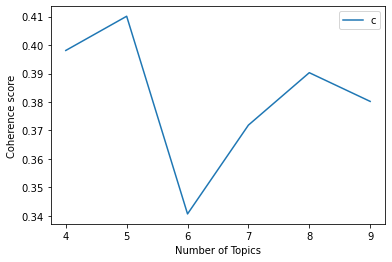

In [99]:
# Show graph
limit=10; start=4; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [100]:
# Print these coherence scores
for m, cv in zip(x, coherence_values):
    print(" Num Topics =", m, "Coherence Value =", round(cv, 4))

 Num Topics = 4 Coherence Value = 0.3981
 Num Topics = 5 Coherence Value = 0.4101
 Num Topics = 6 Coherence Value = 0.3407
 Num Topics = 7 Coherence Value = 0.3719
 Num Topics = 8 Coherence Value = 0.3903
 Num Topics = 9 Coherence Value = 0.3802


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
model_list

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- model_list[n] 和texts = tokens_list_clean  n需要根据前面的图表调整，调整好后再执行下一步

In [102]:
def dominant_topic(ldamodel = model_list[0], corpus = corpus, texts = tokens_list, user_id_str = user_id_str_list, date = date_list):
    # Create DF
    thread_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each thread
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                thread_topics_df = thread_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    thread_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    user_id_str = pd.Series(user_id_str)
    date = pd.Series(date)
    thread_topics_df = pd.concat([thread_topics_df, contents, user_id_str, date], axis=1)
    return thread_topics_df 

df_topic_thread_keywords = dominant_topic(ldamodel = model_list[1], corpus = corpus, texts = data_sam, user_id_str = user_id_str_list, date = date_list)

# Format
df_dominant_topic = df_topic_thread_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'User_id_str', 'date']

# Show
df_dominant_topic

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,User_id_str,date
0,0,0.0,0.3164,"政府, 決定, 方針, 処分, 月内, 首相, 来月, 延期, 責任, 決める",これ、現状のままでは放出できない事を知って欲しい。放出可能な処理水なら良いが現在のALPS処...,276491983,2020-10-15
1,1,1.0,0.4117,"風評, 被害, 反対, 問題, 菅, 国民, 漁業, 政権, 意見, 対策",風評被害なんて本質的な問題ではない処理水の面倒は千年、万年単位でみなければならない予算をケチ...,157225858,2020-10-15
2,2,0.0,0.5918,"政府, 決定, 方針, 処分, 月内, 首相, 来月, 延期, 責任, 決める",ゴジラ福島第１原発の処理水、月内にも方針決定政府、海洋放出軸に調整(河北新報)#Yahooニ...,350760947,2020-10-15
3,3,1.0,0.6856,"風評, 被害, 反対, 問題, 菅, 国民, 漁業, 政権, 意見, 対策",「絶対反対」福島原発処理水の海洋放出で全漁連が経産相に要請https://t.co/51Hq...,1084027001776746501,2020-10-15
4,4,1.0,0.5570,"風評, 被害, 反対, 問題, 菅, 国民, 漁業, 政権, 意見, 対策",福島第一原発の汚染水を浄化処理した後の水の処分で、全漁連の岸会長が梶山経産相と小泉環境相に海...,186029778,2020-10-15
...,...,...,...,...,...,...,...
12161,12161,1.0,0.5418,"風評, 被害, 反対, 問題, 菅, 国民, 漁業, 政権, 意見, 対策",福島では、原発事故による被害が続いている。汚染水問題も解決していない。なのに原発の「新設」を...,1542348228,2020-10-28
12162,12162,1.0,0.4772,"風評, 被害, 反対, 問題, 菅, 国民, 漁業, 政権, 意見, 対策",紙面を開くと核のゴミ最終処分場を許さない！北海道の農民連の取り組みと福島の原発の汚染水の海洋...,1542348228,2020-10-28
12163,12163,1.0,0.4378,"風評, 被害, 反対, 問題, 菅, 国民, 漁業, 政権, 意見, 対策",今日の代表質問。立憲民主党の枝野議員、泉議員の質問への菅首相の答弁。学術会議の任命拒否の理由...,1492074890,2020-10-28
12164,12164,2.0,0.3070,"韓国, 日本, 科学, 世界, 事実, 日本_産_水産物, 輸入_全面_中止, 韓国_国会_...",国・東電は事故に法的責任！原状回復と損害賠償を！～仙台高裁の画期的判決(9・30)勝ち取った...,266194470,2020-10-28


In [103]:
T1 = time_2020[:7]
T2 = time_2020[7:]
T1, T2

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(['2020-10-15',
  '2020-10-16',
  '2020-10-17',
  '2020-10-18',
  '2020-10-19',
  '2020-10-20',
  '2020-10-21'],
 ['2020-10-22',
  '2020-10-23',
  '2020-10-24',
  '2020-10-25',
  '2020-10-26',
  '2020-10-27',
  '2020-10-28'])

In [104]:
df_topic_type_all = df_dominant_topic.join(df_type.set_index("user_id_str"), on = "User_id_str", how = "inner", sort = False)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
df_topic_type_all.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,User_id_str,date,media,political elite,other,public
0,0,0.0,0.3164,"政府, 決定, 方針, 処分, 月内, 首相, 来月, 延期, 責任, 決める",これ、現状のままでは放出できない事を知って欲しい。放出可能な処理水なら良いが現在のALPS処...,276491983,2020-10-15,0,0,0,1
1,1,1.0,0.4117,"風評, 被害, 反対, 問題, 菅, 国民, 漁業, 政権, 意見, 対策",風評被害なんて本質的な問題ではない処理水の面倒は千年、万年単位でみなければならない予算をケチ...,157225858,2020-10-15,0,0,0,1
2,2,0.0,0.5918,"政府, 決定, 方針, 処分, 月内, 首相, 来月, 延期, 責任, 決める",ゴジラ福島第１原発の処理水、月内にも方針決定政府、海洋放出軸に調整(河北新報)#Yahooニ...,350760947,2020-10-15,0,0,0,1
3,3,1.0,0.6856,"風評, 被害, 反対, 問題, 菅, 国民, 漁業, 政権, 意見, 対策",「絶対反対」福島原発処理水の海洋放出で全漁連が経産相に要請https://t.co/51Hq...,1084027001776746501,2020-10-15,0,0,0,1
1880,1880,0.0,0.5538,"政府, 決定, 方針, 処分, 月内, 首相, 来月, 延期, 責任, 決める",政府、海洋放出を月内にも決定福島第１原発処理水https://t.co/mSiQ4kAESO...,1084027001776746501,2020-10-16,0,0,0,1


In [112]:
#df_topic_type = df_topic_type_all.query("Dominant_Topic == 2")
df_topic_type = df_topic_type_all[df_topic_type_all["political elite"] == 1]
df_topic_type = df_topic_type.sort_values(by = "date")
df_topic_type

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,User_id_str,date,media,political elite,other,public
11902,11902,4.0,0.6731,"トリチウム, 海, 事故, 流す, 反対, 含む, 放射, 東京電力, 物質, 放射能",放射性物質、基準値未満に原発処理水の再浄化試行―東電↓また一歩前進。https://t.co...,536910778,2020-10-15,0,1,0,0
11914,11914,0.0,0.3748,"政府, 決定, 方針, 処分, 月内, 首相, 来月, 延期, 責任, 決める",処理水の海洋放出決定へ政府方針、月内にも福島第1原発↓事実だとすると、菅義偉政権の最初の大仕...,536910778,2020-10-15,0,1,0,0
11916,11916,4.0,0.7982,"トリチウム, 海, 事故, 流す, 反対, 含む, 放射, 東京電力, 物質, 放射能",東電福島第一原発で処理水タンク保管を続けられない理由タンクは放射性廃棄物となる。保管を続けれ...,536910778,2020-10-15,0,1,0,0
11936,11936,0.0,0.6150,"政府, 決定, 方針, 処分, 月内, 首相, 来月, 延期, 責任, 決める",汚染処理水の海洋放出決定へ政府方針、月内にも福島第1原発（毎日新聞）-Yahoo!ニュースh...,126533936,2020-10-15,0,1,0,0
11930,11930,1.0,0.3501,"風評, 被害, 反対, 問題, 菅, 国民, 漁業, 政権, 意見, 対策",ブログ更新：福島第一原発の処理水、ついに海洋放出の方針決定？次なる課題は風評被害、甲状腺がん...,75239976,2020-10-15,0,1,0,0
11925,11925,1.0,0.3851,"風評, 被害, 反対, 問題, 菅, 国民, 漁業, 政権, 意見, 対策",原発処理水の海洋放出決定へ2020年10月15日https://t.co/4AGFaMoer...,136122182,2020-10-15,0,1,0,0
11913,11913,4.0,0.5462,"トリチウム, 海, 事故, 流す, 反対, 含む, 放射, 東京電力, 物質, 放射能",漁民の悲痛な声は響かないのか➡️原発処理水の海洋放出決定へ2020年10月15日https:...,134776591,2020-10-15,0,1,0,0
11917,11917,0.0,0.6150,"政府, 決定, 方針, 処分, 月内, 首相, 来月, 延期, 責任, 決める",汚染処理水の海洋放出決定へ政府方針、月内にも福島第1原発（毎日新聞）#Yahooニュースht...,218295612,2020-10-15,0,1,0,0
11975,11975,1.0,0.3483,"風評, 被害, 反対, 問題, 菅, 国民, 漁業, 政権, 意見, 対策",【坂本大臣・記者会見】本日（10月16日）の動画を掲載しました。[冒頭発言]地方創生119番...,2904127170,2020-10-16,0,1,0,0
11976,11976,4.0,0.5056,"トリチウム, 海, 事故, 流す, 反対, 含む, 放射, 東京電力, 物質, 放射能",これは受け入れ難い……関係者の理解も得られている状況ではない……私は敷地外保管で時間的猶予の...,101105979,2020-10-16,0,1,0,0


In [113]:
# 政治精英
for i, d in df_topic_type.iterrows():
    print(d.date, "\n", d.Text)

2020-10-15 
 放射性物質、基準値未満に原発処理水の再浄化試行―東電↓また一歩前進。https://t.co/8YS5By3ymQ
2020-10-15 
 処理水の海洋放出決定へ政府方針、月内にも福島第1原発↓事実だとすると、菅義偉政権の最初の大仕事だ。政治家にしかできない歴史的な決断。厳しい批判があろうとやりきらなければならない。毎日新聞は「汚染処理水」と書いたが「汚染」は取った。ここも戦い。https://t.co/L81KE49kao
2020-10-15 
 東電福島第一原発で処理水タンク保管を続けられない理由タンクは放射性廃棄物となる。保管を続ければ廃棄物が増えるタンクは改良されたが、台風や竜巻によって処理しきれていない水が流出するリスクがあるタンクの水漏れや劣化をチェックする作業は危険を伴う。タンクから転落死した作業員もいる
2020-10-15 
 汚染処理水の海洋放出決定へ政府方針、月内にも福島第1原発（毎日新聞）-Yahoo!ニュースhttps://t.co/7I7nGDmb0e
2020-10-15 
 ブログ更新：福島第一原発の処理水、ついに海洋放出の方針決定？次なる課題は風評被害、甲状腺がん検診だhttps://t.co/mperov2XbD本件は維新がちょうど1年前にタスクフォースを発足し、「海洋放出を早期に行うべき」との結論を取りまとめ、国会で何度も提言を繰り返してきたところです。
2020-10-15 
 原発処理水の海洋放出決定へ2020年10月15日https://t.co/4AGFaMoerQ→維新が提案してきたことをようやく決定されました。さすが、菅政権は、地元からの批判を恐れず決断しました。
2020-10-15 
 漁民の悲痛な声は響かないのか➡️原発処理水の海洋放出決定へ2020年10月15日https://t.co/S3qTOTkiHk東京電力福島第1原発のタンクにたまり続けている汚染処理水について、政府は、放射性物質の濃度を下げた後に海に流して処分する方針を固めた。
2020-10-15 
 汚染処理水の海洋放出決定へ政府方針、月内にも福島第1原発（毎日新聞）#Yahooニュースhttps://t.co/i51MVMWHTo
2020-10-16 
 【坂本大臣・記者会見】本日（10月16日）の動画を掲載し

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
df_topic_type = df_topic_type_all.query('date in @T2')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
# media
df_topic_type[df_topic_type["media"] == 1].Dominant_Topic.value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0    18
0.0    17
4.0    13
2.0     6
3.0     2
Name: Dominant_Topic, dtype: int64

In [63]:
# political elite
df_topic_type[df_topic_type["political elite"] == 1].Dominant_Topic.value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0    8
4.0    4
0.0    3
2.0    1
Name: Dominant_Topic, dtype: int64

In [64]:
# 自媒体
df_topic_type[df_topic_type["other"] == 1].Dominant_Topic.value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4.0    110
1.0     48
2.0     45
0.0     43
3.0     31
Name: Dominant_Topic, dtype: int64

In [65]:
# public
df_topic_type[df_topic_type["public"] == "1"].Dominant_Topic.value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4.0    1223
2.0     683
1.0     617
0.0     234
3.0     133
Name: Dominant_Topic, dtype: int64

In [58]:
df_dominant_topic.Dominant_Topic.value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4.0    4175
0.0    2288
1.0    2245
2.0    2105
3.0    1353
Name: Dominant_Topic, dtype: int64

In [59]:
#df_topic = df_dominant_topic.loc[df_dominant_topic['Dominant_Topic'] == 1.0].reset_index(drop = True)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
#for i in range(df_topic.shape[0]):
#    print(i, df_topic.Text[i], "\n")

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
df_topic_type_all.info()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12166 entries, 0 to 12163
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Document_No         12166 non-null  int64  
 1   Dominant_Topic      12166 non-null  float64
 2   Topic_Perc_Contrib  12166 non-null  float64
 3   Keywords            12166 non-null  object 
 4   Text                12166 non-null  object 
 5   User_id_str         12166 non-null  int64  
 6   date                12166 non-null  object 
 7   media               12166 non-null  object 
 8   political elite     12166 non-null  object 
 9   other               12166 non-null  object 
 10  public              12166 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.1+ MB


In [68]:
# 抽取千分之五条：12166*千分之五 = 60.83
np.random.seed(43)
df_topic_type = df_topic_type_all.sample(61)
df_topic_type.reset_index(drop = True, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
#import csv
#with open("manual_code_stage2_predict.csv", "w", encoding = "utf-8") as f:
    #for i, d in df_topic_type.iterrows():
        #csvw = csv.writer(f)
        #csvw.writerow([d.Text, d.Dominant_Topic, d.Keywords])
        #f.write(d.Text+"\n")

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
